In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv("penguins_regression.csv")
print(dataset)

     Flipper Length (mm)  Body Mass (g)
0                    181           3750
1                    186           3800
2                    195           3250
3                    193           3450
4                    190           3650
..                   ...            ...
195                  222           5550
196                  217           4900
197                  210           4200
198                  225           5400
199                  213           5100

[200 rows x 2 columns]


In [18]:
x = dataset[['Flipper Length (mm)']].values
y = dataset['Body Mass (g)'].values

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [20]:
regressor = DecisionTreeRegressor(max_depth=4, random_state=1)
regressor.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=4, random_state=1)

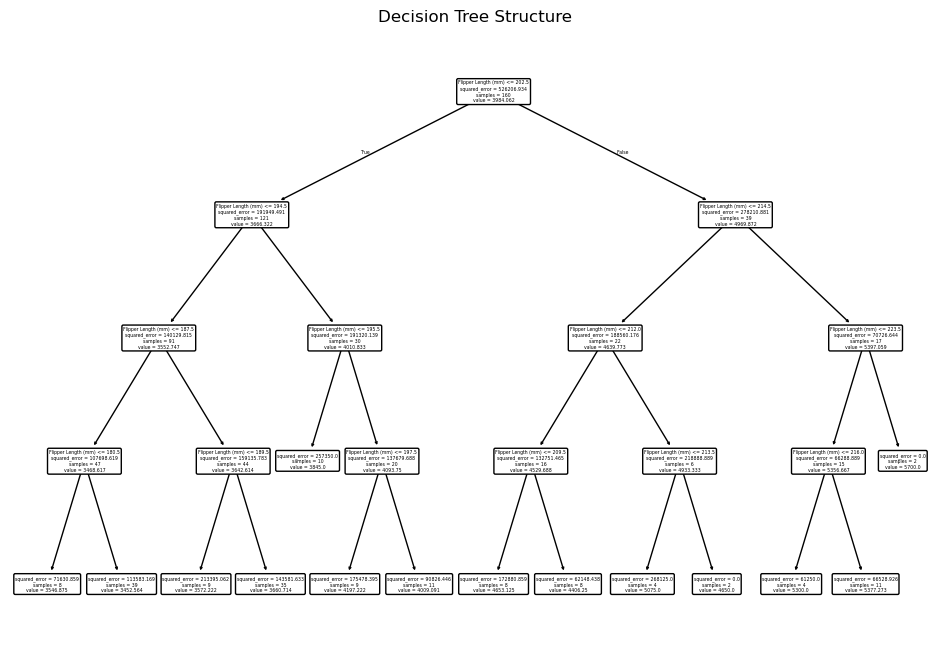

In [21]:
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=False, feature_names=['Flipper Length (mm)'], rounded=True)
plt.title("Decision Tree Structure")
plt.show()

In [22]:
ypred = regressor.predict(xtest)

print("Accuracy Metrics for Regression:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(ytest, ypred):.2f} grams")
print(f"Mean Squared Error (MSE): {mean_squared_error(ytest, ypred):.2f}")
print(f"R2 Score: {r2_score(ytest, ypred):.2f}")


Accuracy Metrics for Regression:
Mean Absolute Error (MAE): 360.88 grams
Mean Squared Error (MSE): 221449.82
R2 Score: 0.67


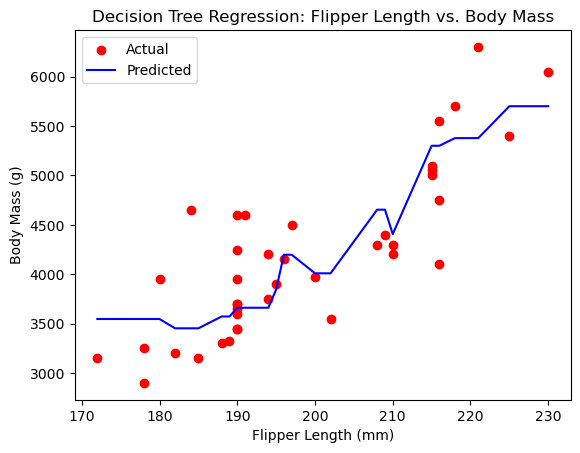

In [23]:
sorted_indices = xtest.flatten().argsort()
xtestsorted = xtest[sorted_indices]
ypredsorted = ypred[sorted_indices]

# Plot actual vs predicted values
plt.scatter(xtest, ytest, color='red', label='Actual')
plt.plot(xtestsorted, ypredsorted, color='blue', label='Predicted')
plt.title('Decision Tree Regression: Flipper Length vs. Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()


In [26]:
from sklearn.tree import export_graphviz

export_graphviz(regressor, out_file="decision_tree.dot", 
                feature_names=['Flipper Length (mm)'], 
                filled=False, rounded=True, special_characters=True)

print("Decision Tree exported as 'decision_tree.dot'")


Decision Tree exported as 'decision_tree.dot'


In [25]:
sample = np.array([[190]])
predictedmass = regressor.predict(sample)
print(f"Flipper Length: {sample[0][0]} mm => Predicted Body Mass: {predictedmass[0]:.2f} grams")


Flipper Length: 190 mm => Predicted Body Mass: 3660.71 grams
